In [6]:
def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()  #strip()用来移除字符串头尾指导的字符，默认移除空格；split()通过指导字符对字符串切片，默认为空格
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])  #list.append()添加新对象
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

#### 逻辑回归-梯度上升算法

In [7]:
def sigmoid(inX):
    return 1.0/(1+exp(-inX))

In [8]:
from numpy import *
def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn) #转换成NumPy矩阵数据类型numpy.matrixlib.defmatrix.matrix
    labelMat = mat(classLabels).transpose()  #transpose()把矩阵行和列转置
    m, n = shape(dataMatrix)  #读取矩阵维度 100,3
    alpha = 0.001  #步长
    maxCycles = 500  #迭代次数
    weights = ones((n,1))  #初始权重[1,1,1]，ones()创建n维数组，元素值为1
    for k in range(maxCycles):
        z = dataMatrix * weights  #z=w0*1+w1*x1+w2*x2 算出的z是100*1的矩阵  累计计算了300*500次乘法
        h = sigmoid(z)  #h是100*1的列向量
        error = labelMat - h  #真实值减去预测值
        weights = weights + alpha * dataMatrix.transpose() * error  #梯度上升算法的迭代公式
    return weights

In [9]:
data1, label1 = loadDataSet()
rellweights = gradAscent(data1, label1)
print(rellweights)

[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


#### 可视化

In [10]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat, labelMat = loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1]);ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]);ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x1 = arange(-3.0, 3.0, 0.1)
    # z=w0*1+w1*x1+w2*x2 当z=0时，sigmoid()函数结果为0,1分界线。
    x2 = (-weights[0]-weights[1]*x1)/weights[2]
    ax.plot(x1, x2)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

In [11]:
plotBestFit(rellweights.getA())
#逻辑回归公式图像如下：

<Figure size 640x480 with 1 Axes>

#### 随机梯度上升算法

In [12]:
# 每次更新回归系数时都需要处理整个数据集，计算复杂度太高。
# 改进成每次更新回归系数只使用一个样本，这样算法可以变成【在线学习算法】，每一个新样本都可以在线更新回归系数

In [13]:
def stocGradAscent0(dataMatIn, classLabels):
    dataMatrix = array(dataMatIn)  #numpy.ndarray格式
    m, n = shape(dataMatIn)
    alpha = 0.01
    weights = ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * dataMatrix[i] * error
    return weights

[ 1.01702007  0.85914348 -0.36579921]


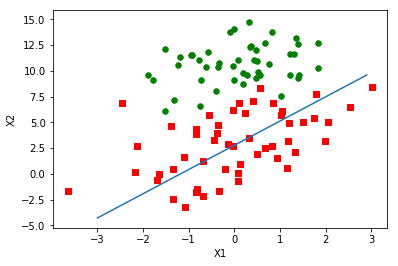

In [14]:
rellweights = stocGradAscent0(data1, label1)
print(rellweights)
plotBestFit(rellweights)

#### 改进的随机梯度上升算法 

In [20]:
def stocGradAscent1(dataMatIn, classLabels, numTter=150):
    dataMatrix = array(dataMatIn)  #numpy.ndarray格式
    m, n = shape(dataMatIn)
    weights = ones(n)
    for j in range(numTter):
        dataIndex = range(m)   #list[0,1,...,99]
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.1  #用来缓解数据波动或者高频波动，alpha会随着迭代次数减少
            randIndex = int(random.uniform(0, len(dataIndex)))  #有利于减少周期性波动
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * dataMatrix[randIndex] * error
            del(dataIndex[randIndex])  #减去已经使用的抽样
    return weights

[25.48663666  1.7525952  -3.74581665]


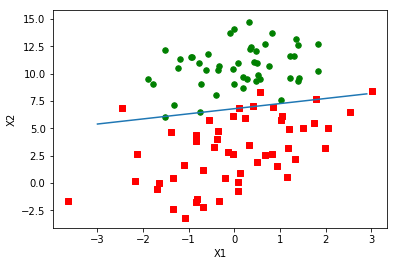

In [21]:
rellweights = stocGradAscent1(data1, label1)
print(rellweights)
plotBestFit(rellweights)

### 预测马的死亡率

#### 模型

In [22]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0

#### 数据处理与判断错误率

In [23]:

def colicTest():
    frTrain = open('horseColicTraining.txt'); frTest = open('horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(array(trainingSet), trainingLabels, 1000)
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr), trainWeights))!= int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print "the error rate of this test is: %f" % errorRate
    return errorRate

def multiTest():
    numTests = 10; errorSum=0.0
    for k in range(numTests):
        errorSum += colicTest()
    print "after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests))

In [24]:
multiTest()

D:\anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


the error rate of this test is: 0.313433
the error rate of this test is: 0.402985
the error rate of this test is: 0.358209
the error rate of this test is: 0.313433
the error rate of this test is: 0.373134
the error rate of this test is: 0.507463
the error rate of this test is: 0.373134
the error rate of this test is: 0.388060
the error rate of this test is: 0.373134
the error rate of this test is: 0.253731
after 10 iterations the average error rate is: 0.365672
